<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-21 13:05:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.2MB/s    in 3.2s    

2025-03-21 13:05:59 (63.0 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


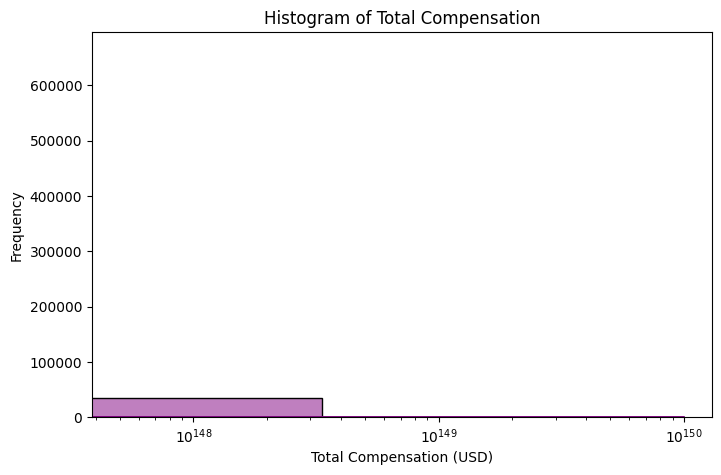

In [9]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)

# Convert to numeric if necessary
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["CompTotal"], bins=30, kde=True, color="purple")

# Labels and title
plt.xlabel("Total Compensation (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Total Compensation")
plt.xscale("log")  # Log scale for better visualization (optional)

# Show plot
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [10]:
QUERY = """
SELECT YearsCodePro, COUNT(*) AS Freq
FROM main
WHERE YearsCodePro IS NOT NULL
GROUP BY YearsCodePro;
"""
pd.read_sql_query(QUERY, conn)

,YearsCodePro,Freq
0,1,2639
1,10,3251
2,11,1312
3,12,1777
4,13,1127
5,14,1082
6,15,1635
7,16,946
8,17,814
9,18,867


In [11]:
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)


In [12]:
# Define replacements for specific string values
replace_dict = {
    "Less than 1 year": 0.5,   # Represent as 0.5 years
    "More than 50 years": 51   # Represent as 51 years
}

# Apply replacements and convert to numeric
df["YearsCodePro"] = df["YearsCodePro"].replace(replace_dict)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

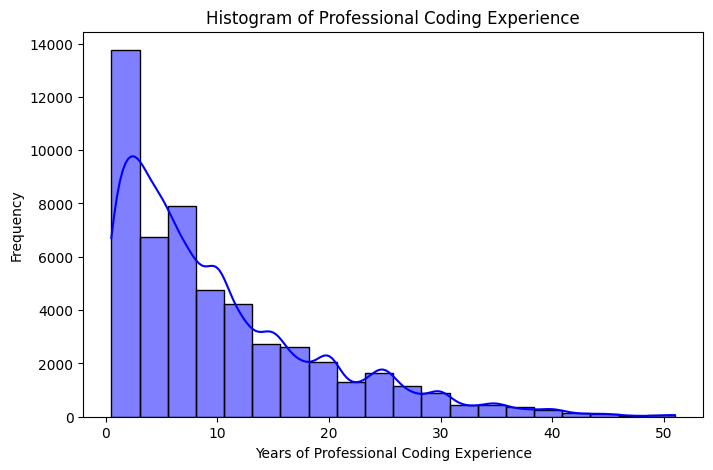

In [13]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["YearsCodePro"], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.title("Histogram of Professional Coding Experience")

# Show plot
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [14]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)
df

,Age,CompTotal
0,18-24 years old,2040000.0
1,25-34 years old,28000.0
2,35-44 years old,85000.0
3,35-44 years old,50000.0
4,25-34 years old,110000.0
...,...,...
33735,18-24 years old,36000.0
33736,25-34 years old,40000.0
33737,25-34 years old,61000.0
33738,35-44 years old,58000.0


In [15]:
# Convert Age to a categorical variable
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]
df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

# Convert CompTotal to numeric
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

/tmp/ipykernel_518/2007635314.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")


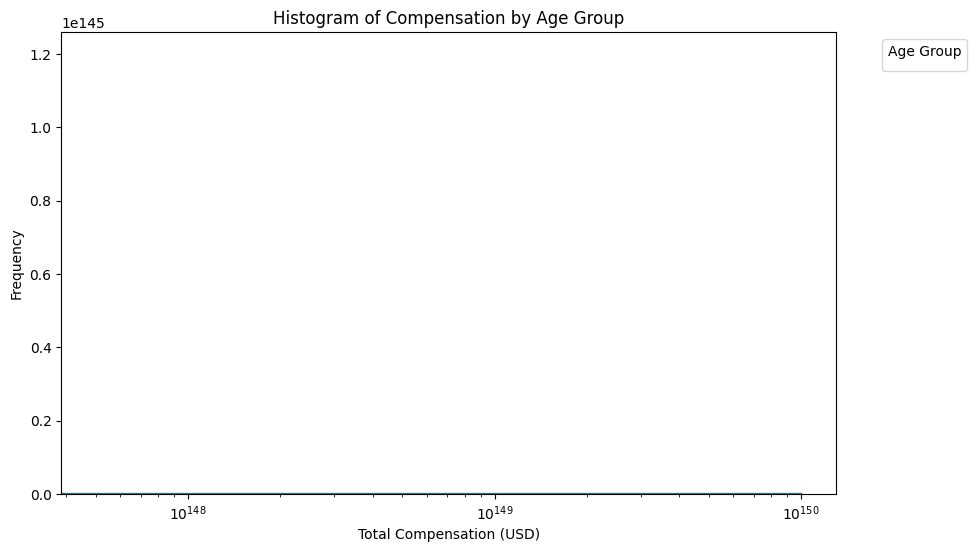

In [16]:
# Plot histograms for each Age group
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="CompTotal", hue="Age", bins=30, kde=True, element="step")

# Labels and title
plt.xlabel("Total Compensation (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Compensation by Age Group")
plt.xscale("log")  # Log scale for better visualization
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()

In [17]:
print(df.head())  # Check the first few rows
print(df.info()) 

               Age  CompTotal
0  18-24 years old  2040000.0
1  25-34 years old    28000.0
2  35-44 years old    85000.0
3  35-44 years old    50000.0
4  25-34 years old   110000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33740 entries, 0 to 33739
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        33726 non-null  category
 1   CompTotal  33740 non-null  float64 
dtypes: category(1), float64(1)
memory usage: 297.0 KB
None


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [17]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching 
FROM main 
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL;
"""
df = pd.read_sql_query(QUERY, conn)
df

,Age,TimeSearching
0,35-44 years old,30-60 minutes a day
1,35-44 years old,30-60 minutes a day
2,45-54 years old,60-120 minutes a day
3,25-34 years old,15-30 minutes a day
4,25-34 years old,Less than 15 minutes a day
...,...,...
28906,18-24 years old,30-60 minutes a day
28907,18-24 years old,60-120 minutes a day
28908,25-34 years old,Less than 15 minutes a day
28909,25-34 years old,15-30 minutes a day


In [18]:
# Define mapping for TimeSearching
time_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "More than 4 hours a day": 270
}

# Apply mapping
df["TimeSearching"] = df["TimeSearching"].map(time_mapping)

# Drop NaNs if any mapping failed
df = df.dropna(subset=["TimeSearching"])
df

,Age,TimeSearching
0,35-44 years old,45.0
1,35-44 years old,45.0
2,45-54 years old,90.0
3,25-34 years old,22.5
4,25-34 years old,7.5
...,...,...
28906,18-24 years old,45.0
28907,18-24 years old,90.0
28908,25-34 years old,7.5
28909,25-34 years old,22.5


In [19]:
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]

df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)

/tmp/ipykernel_518/2443597018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = pd.Categorical(df["Age"], categories=age_order, ordered=True)


In [21]:
df = df.dropna(subset=["Age"])
df

,Age,TimeSearching
0,35-44 years old,45.0
1,35-44 years old,45.0
2,45-54 years old,90.0
3,25-34 years old,22.5
4,25-34 years old,7.5
...,...,...
28906,18-24 years old,45.0
28907,18-24 years old,90.0
28908,25-34 years old,7.5
28909,25-34 years old,22.5


/tmp/ipykernel_518/2250219500.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")


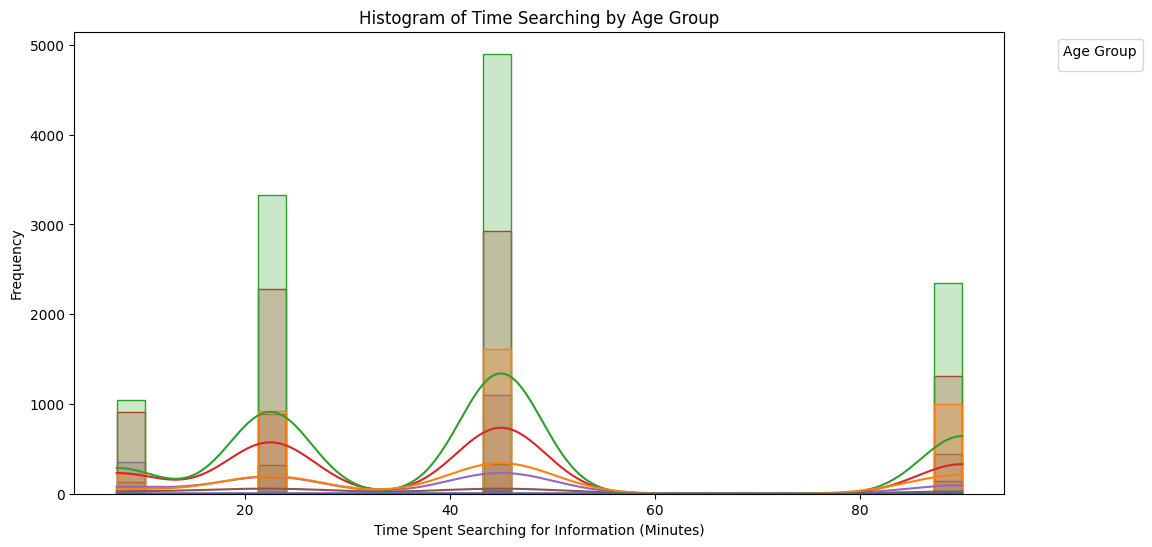

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="TimeSearching", hue="Age", bins=30, kde=True, element="step")

# Labels and title
plt.xlabel("Time Spent Searching for Information (Minutes)")
plt.ylabel("Frequency")
plt.title("Histogram of Time Searching by Age Group")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()

In [27]:
print(df["Age"].unique())
print(df["Age"].isna().sum())

['35-44 years old', '45-54 years old', '25-34 years old', '55-64 years old', '18-24 years old', '65 years or older', 'Under 18 years old']
Categories (7, object): ['Under 18 years old' < '18-24 years old' < '25-34 years old' < '35-44 years old' < '45-54 years old' < '55-64 years old' < '65 years or older']
0


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [23]:
## Write your code here
QUERY = """
WITH RECURSIVE SplitData AS (
    SELECT 
        SUBSTR(DatabaseWantToWorkWith, 1, INSTR(DatabaseWantToWorkWith || ';', ';') - 1) AS Database,
        SUBSTR(DatabaseWantToWorkWith, INSTR(DatabaseWantToWorkWith || ';', ';') + 1) AS Remaining
    FROM main
    WHERE DatabaseWantToWorkWith IS NOT NULL
    UNION ALL
    SELECT 
        SUBSTR(Remaining, 1, INSTR(Remaining || ';', ';') - 1),
        SUBSTR(Remaining, INSTR(Remaining || ';', ';') + 1)
    FROM SplitData
    WHERE Remaining != '' 
)
SELECT Database, COUNT(*) AS Frequency
FROM SplitData
WHERE Database IS NOT NULL
GROUP BY Database
ORDER BY Frequency DESC
LIMIT 5;
"""
df = pd.read_sql_query(QUERY, conn)
df

,Database,Frequency
0,PostgreSQL,24005
1,SQLite,13489
2,MySQL,12269
3,MongoDB,10982
4,Redis,10847


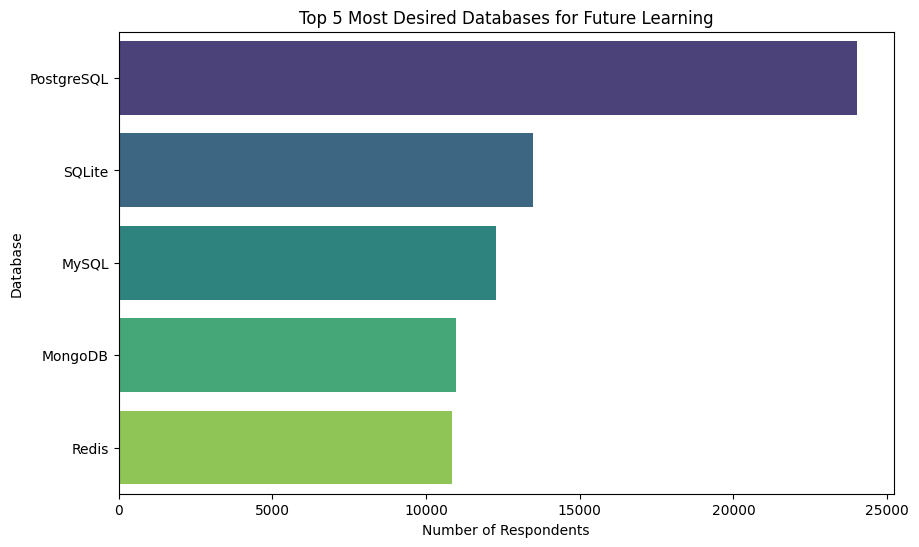

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Frequency", y="Database", hue="Database", palette="viridis", legend=False)

plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.title("Top 5 Most Desired Databases for Future Learning")
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [25]:
## Write your code here
QUERY = """
    SELECT RemoteWork, COUNT(*) AS Frequency
    FROM main
    WHERE RemoteWork IS NOT NULL
    GROUP BY RemoteWork
    ORDER BY Frequency DESC
;
"""
df = pd.read_sql_query(QUERY, conn)
df

,RemoteWork,Frequency
0,"Hybrid (some remote, some in-person)",23015
1,Remote,20831
2,In-person,10960


/tmp/ipykernel_518/2290381528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Frequency", y="RemoteWork", palette="viridis")


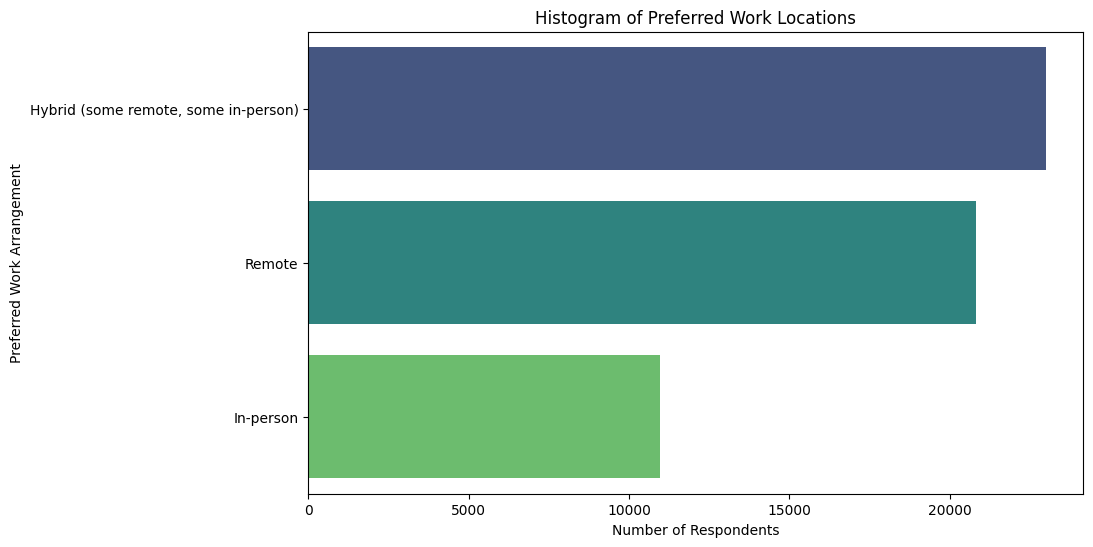

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Frequency", y="RemoteWork", palette="viridis")

plt.xlabel("Number of Respondents")
plt.ylabel("Preferred Work Arrangement")
plt.title("Histogram of Preferred Work Locations")
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [28]:
## Write your code here
QUERY = """
    SELECT Age, CompTotal
    FROM main
    WHERE Age IN ('45-54 years old', '55-64 years old') 
    AND CompTotal IS NOT NULL
;
"""
df = pd.read_sql_query(QUERY, conn)
df

,Age,CompTotal
0,45-54 years old,95000.0
1,45-54 years old,195000.0
2,55-64 years old,54000.0
3,45-54 years old,145000.0
4,55-64 years old,80000.0
...,...,...
4790,45-54 years old,40000.0
4791,45-54 years old,250000.0
4792,45-54 years old,250000.0
4793,45-54 years old,157000.0


In [32]:
age_mapping = {
    '45-54 years old': 49.5,
    '55-64 years old': 59.5
}

df['AgeNumeric'] = df['Age'].map(age_mapping)
df

,Age,CompTotal,AgeNumeric
0,45-54 years old,95000.0,49.5
1,45-54 years old,195000.0,49.5
2,55-64 years old,54000.0,59.5
3,45-54 years old,145000.0,49.5
4,55-64 years old,80000.0,59.5
...,...,...,...
4790,45-54 years old,40000.0,49.5
4791,45-54 years old,250000.0,49.5
4792,45-54 years old,250000.0,49.5
4793,45-54 years old,157000.0,49.5


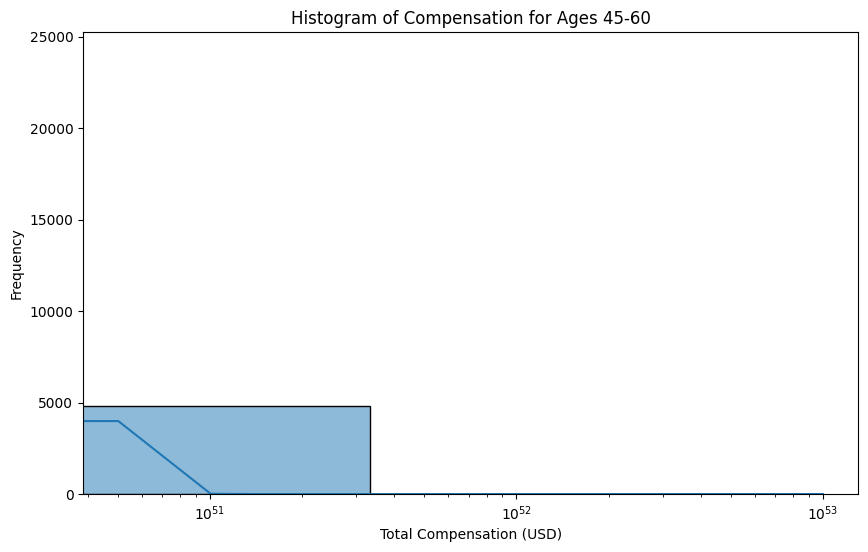

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="CompTotal", bins=30, kde=True)

plt.xlabel("Total Compensation (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Compensation for Ages 45-60")
plt.xscale("log")  # Log scale for better readability
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [33]:
## Write your code here
QUERY = """
    SELECT JobSat, YearsCodePro
    FROM main
    WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
;
"""
df = pd.read_sql_query(QUERY, conn)
df

,JobSat,YearsCodePro
0,8.0,12
1,5.0,27
2,10.0,10
3,6.0,Less than 1 year
4,9.0,18
...,...,...
28351,8.0,17
28352,5.0,10
28353,8.0,2
28354,8.0,7


In [35]:
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Convert valid numbers and replace mapped values
df['YearsCodePro'] = df['YearsCodePro'].replace(years_mapping)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

/tmp/ipykernel_518/498064789.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc="upper left")


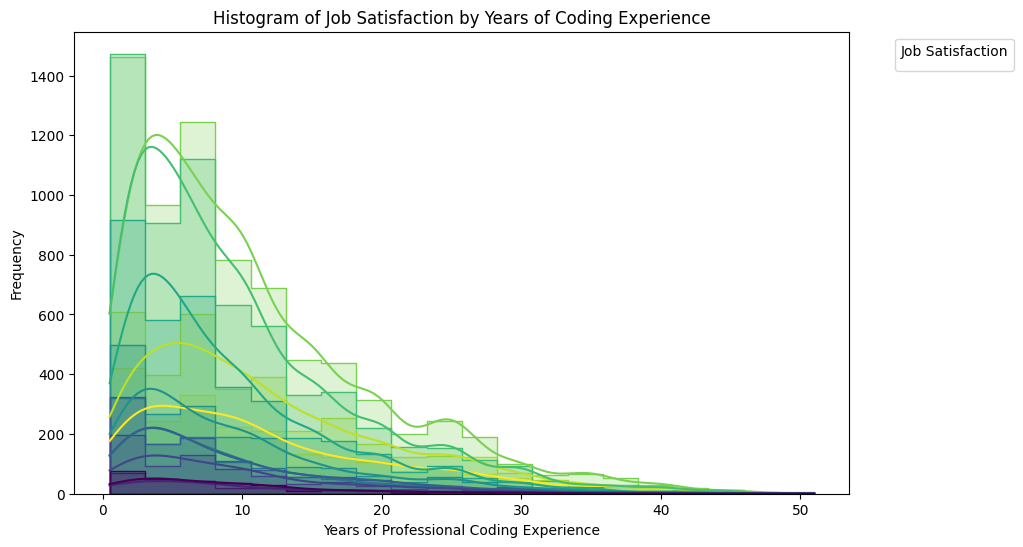

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="YearsCodePro", hue="JobSat", bins=20, kde=True, element="step", palette="viridis")

plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.title("Histogram of Job Satisfaction by Years of Coding Experience")
plt.legend(title="Job Satisfaction", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
